In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from scipy.ndimage.interpolation import shift
from tqdm import tqdm

<ipython-input-1-be3823d998e9>:14: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


# Obtener los datos

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [ ]:
X, y = mnist["data"], mnist["target"]

# Primer vistazo a los datos

In [ ]:
print(X, '\n\n', X.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

 (70000, 784)


In [ ]:
print(y, '\n\n', y.shape)

['5' '0' '4' ... '4' '5' '6'] 

 (70000,)


In [ ]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")
  plt.show()

# Visualizar los datos

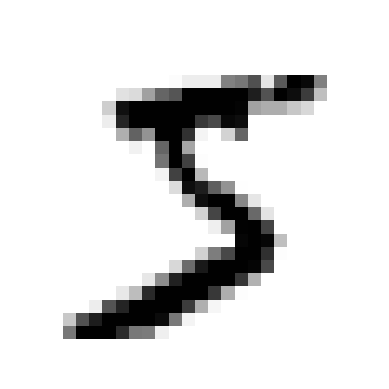

In [ ]:
x_some_digit = X[0]
plot_digit(x_some_digit)

In [ ]:
y_some_digit = y[0]
print(y_some_digit)

5


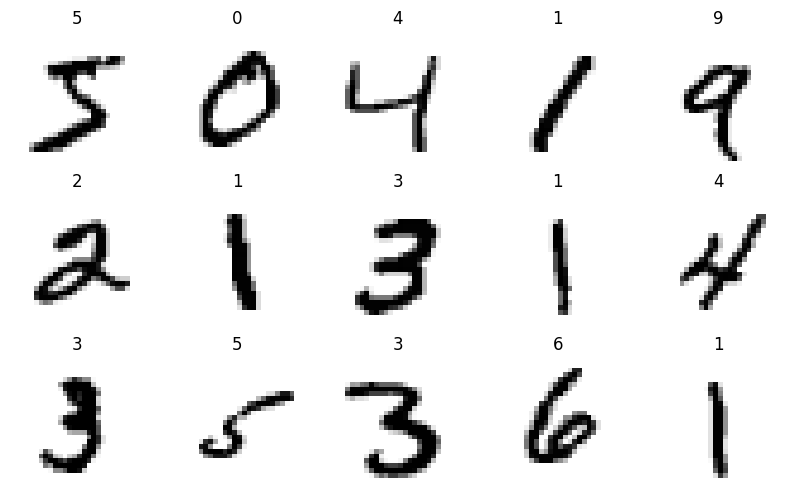

In [ ]:
import matplotlib.pyplot as plt
n_rows = 3
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

for i in range(15):
    row = i // n_cols
    col = i % n_cols
    image = X[i].reshape(28, 28)
    axes[row, col].imshow(image, cmap="binary")
    axes[row, col].axis("off")
    axes[row, col].set_title(y[i])

plt.show()

# Crear un conjunto de prueba

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Crear un subconjunto de train para evaluar varios modelos

In [ ]:
X_train_small, y_train_small = X[:4000], y[:4000]

# Probar distintos modelos de clasificación

## Regresión logística

In [ ]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, random_state=42)
log_reg.fit(X_train_small, y_train_small)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [ ]:
scores = cross_val_score(log_reg, X_train_small, y_train_small, cv=3)
print("Scores de validación cruzada:", scores)    # Cantidad de aciertos (Accuracity)
print("Puntuación media de validación cruzada:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Scores de validación cruzada: [0.85382309 0.88447112 0.88072018]
Puntuación media de validación cruzada: 0.8730047954267427


## Support Vector Machine Classifier (SVC) - Descartado (NO ESCALABLE)

In [ ]:
# svc = SVC(random_state=42)
# svc.fit(X_train_small, y_train_small)

In [ ]:
# scores = cross_val_score(svc, X_train_small, y_train_small, cv=3)
# print("Scores de validación cruzada:", scores)
# print("Puntuación media de validación cruzada:", scores.mean())

## Decission Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_small, y_train_small)

DecisionTreeClassifier(random_state=42)

In [ ]:
scores = cross_val_score(tree, X_train_small, y_train_small, cv=3)
print("Scores de validación cruzada:", scores)
print("Puntuación media de validación cruzada:", scores.mean())

Scores de validación cruzada: [0.74662669 0.77194299 0.73818455]
Puntuación media de validación cruzada: 0.7522514061798807


## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_small, y_train_small)

RandomForestClassifier(random_state=42)

In [ ]:
scores = cross_val_score(rf, X_train_small, y_train_small, cv=3)
print("Scores de validación cruzada:", scores)
print("Puntuación media de validación cruzada:", scores.mean())

Scores de validación cruzada: [0.90929535 0.92723181 0.92498125]
Puntuación media de validación cruzada: 0.9205028018623848


## k-Nearest Neighbors (k-NN)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_small, y_train_small)

KNeighborsClassifier()

In [ ]:
scores = cross_val_score(knn, X_train_small, y_train_small, cv=3)
print("Scores de validación cruzada:", scores)
print("Puntuación media de validación cruzada:", scores.mean())

Scores de validación cruzada: [0.90029985 0.92873218 0.92048012]
Puntuación media de validación cruzada: 0.9165040510502438


# Entrenar mejor modelo (k-NN) con todos los datos i evaluar errores

In [ ]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

In [ ]:
print("precisión: ",precision_score(y_train, y_train_pred, average='weighted'))
print("sensitividad: ", recall_score(y_train, y_train_pred, average='weighted'))
print("f1_score: ", f1_score(y_train, y_train_pred, average='weighted'))

precisión:  0.9676755320854337
sensitividad:  0.9674166666666667
f1_score:  0.9673453023960277


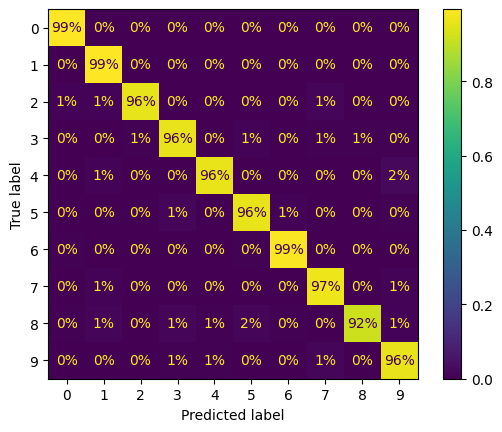

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

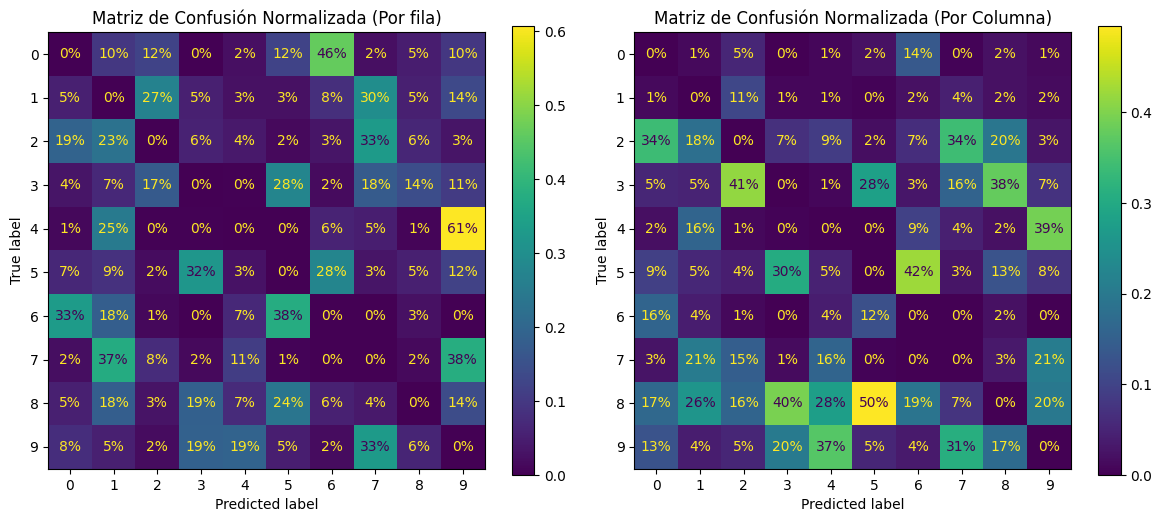

In [ ]:
sample_weight = (y_train_pred != y_train)


# Crear una figura y una cuadrícula de subgráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primera figura
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%", ax=ax[0])
ax[0].set_title("Matriz de Confusión Normalizada (Por fila)")

# Segunda figura
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%", ax=ax[1])
ax[1].set_title("Matriz de Confusión Normalizada (Por Columna)")

plt.tight_layout()
plt.show()

# Búsqueda Aleatoria

In [ ]:
# param_dist = {
#     'n_neighbors': randint(6, 15),
# }

In [ ]:
# rnd_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=2, random_state=42, verbose=2)
# rnd_search_knn.fit(X_train, y_train)

In [ ]:
# print("Mejores hiperparámetros encontrados para Random Forest:")
# print(rnd_search_knn.best_params_)
# print()
# print("Mejor puntuación de validación cruzada para Random Forest:")
# print(rnd_search_knn.best_score_)

Mejores hiperparámetros encontrados para Random Forest:
{'n_neighbors': 7, 'weights': 'distance'}

Mejor puntuación de validación cruzada para Random Forest:
0.9634166666666666

In [ ]:
# cv_results = rnd_search_knn.cv_results_
# results_df = pd.DataFrame(cv_results)
# results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)
# results_df.head()

## Búsqueda exhaustiva k-nn

In [ ]:
# param_grid = {
#     'n_neighbors': [2,3,4,5],
#     'weights': ['uniform', 'distance'],
# }

In [ ]:
# grid_search = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', verbose=2)
# grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .....................n_neighbors=2, weights=uniform; total time= 1.1min
[CV] END .....................n_neighbors=2, weights=uniform; total time=  58.9s
[CV] END ....................n_neighbors=2, weights=distance; total time=  58.2s
[CV] END ....................n_neighbors=2, weights=distance; total time=  57.4s
[CV] END .....................n_neighbors=3, weights=uniform; total time= 1.1min
[CV] END .....................n_neighbors=3, weights=uniform; total time= 1.0min
[CV] END ....................n_neighbors=3, weights=distance; total time=  59.1s
[CV] END ....................n_neighbors=3, weights=distance; total time= 1.0min
[CV] END .....................n_neighbors=4, weights=uniform; total time= 1.1min
[CV] END .....................n_neighbors=4, weights=uniform; total time= 1.0min
[CV] END ....................n_neighbors=4, weights=distance; total time= 1.0min
[CV] END ....................n_neighbors=4, weigh

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
# cv_results = grid_search.cv_results_
# results_df = pd.DataFrame(cv_results)
# results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)
# results_df.head(16)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
5,0.232638,0.015640,60.080139,1.127472,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.967500,0.966200,0.966850,0.000650,1
3,0.214475,0.018929,59.451318,0.591488,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.966800,0.965700,0.966250,0.000550,2
7,0.212430,0.008679,60.316091,0.159757,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.964833,0.965567,0.965200,0.000367,3
2,0.245329,0.035541,62.093116,1.456433,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.965633,0.964500,0.965067,0.000567,4
1,0.213428,0.010307,57.615625,0.409211,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.964367,0.963867,0.964117,0.000250,5
6,0.213241,0.012821,61.931820,1.104170,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.963367,0.963933,0.963650,0.000283,6
4,0.248033,0.014947,62.788938,0.721878,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.962233,0.962500,0.962367,0.000133,7
0,2.190599,1.930991,59.010274,0.391180,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.956267,0.957533,0.956900,0.000633,8


In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

grid_search.best_params_ {'n_neighbors': 4,  'weights': 'distance'}

grid_search.best_score_ {'mean_test_score': 0.966850}

## Aumento de datos

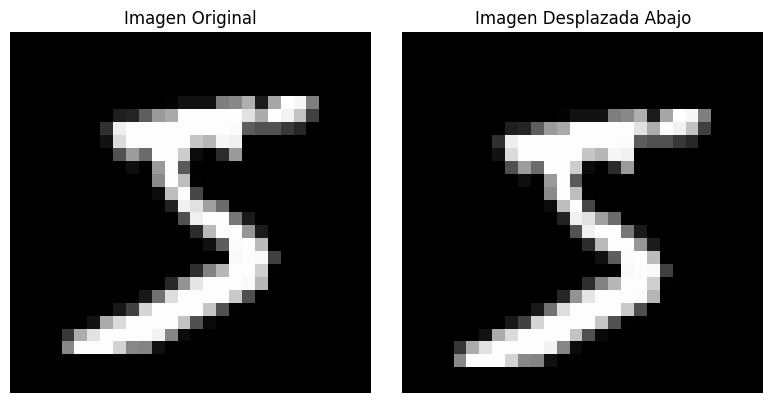

In [ ]:
def plot_digit(ax, data, title):
    ax.imshow(data, cmap='gray')
    ax.axis('off')
    ax.set_title(title)

x_some_digit = X[0].reshape(28, 28)
x_shifted_down = shift(x_some_digit, shift=[1, 0], cval=0)


fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1 fila, 2 columnas
plot_digit(ax[0], x_some_digit, "Imagen Original")
plot_digit(ax[1], x_shifted_down, "Imagen Desplazada Abajo")

plt.tight_layout()
plt.show()

In [ ]:
new_images = []
new_labels = []

# Usar tqdm para mostrar una barra de carga
for i in tqdm(range(X_train.shape[0]), desc="Procesando imágenes"):
    x_some_digit = X_train[i].reshape(28, 28)

    x_shifted_up = shift(x_some_digit, shift=[-1, 0], cval=0)
    x_shifted_down = shift(x_some_digit, shift=[1, 0], cval=0)
    x_shifted_left = shift(x_some_digit, shift=[0, -1], cval=0)
    x_shifted_right = shift(x_some_digit, shift=[0, 1], cval=0)

    new_images.append(x_shifted_up.flatten())
    new_images.append(x_shifted_down.flatten())
    new_images.append(x_shifted_left.flatten())
    new_images.append(x_shifted_right.flatten())

    new_labels.extend([y_train[i]] * 4)  # Agregar la etiqueta correspondiente cuatro veces

new_images = np.array(new_images)
new_labels = np.array(new_labels)

X_train_augmented = np.vstack((X_train, new_images))
y_train_augmented = np.concatenate((y_train, new_labels))

print("Tamaño original del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de entrenamiento ampliado:", X_train_augmented.shape)



Procesando imágenes: 100%|██████████| 60000/60000 [00:40<00:00, 1476.01it/s]


Tamaño original del conjunto de entrenamiento: (60000, 784)
Tamaño del conjunto de entrenamiento ampliado: (300000, 784)


## Entrenar el modelo con todos los datos ampliados

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=4, weights='distance')
scores = cross_val_score(knn_best, X_train_augmented, y_train_augmented, cv=3, verbose=2)

[CV] END .................................................... total time=24.6min
[CV] END .................................................... total time=24.2min
[CV] END .................................................... total time=24.5min


In [ ]:
print("Scores de validación cruzada:", scores)
print("Puntuación media de validación cruzada:", scores.mean())

Scores de validación cruzada: [0.98389 0.98129 0.98027]
Puntuación media de validación cruzada: 0.9818166666666667


Scores de validación cruzada: [0.98389 0.98129 0.98027]

Puntuación media de validación cruzada: 0.9818166666666667

In [ ]:
y_train_pred = cross_val_predict(knn_best, X_train_augmented, y_train_augmented, cv=3, verbose=2)
f1 = f1_score(y_train_augmented, y_train_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.981800150528314
